#### Task i
Use Python tools, such as Pandas, NumPy, and Matplotlib, to read the <br>
dataset, and plot a figure that shows the dependency ratio of Sweden from <br>
1860 to 2022 <br>

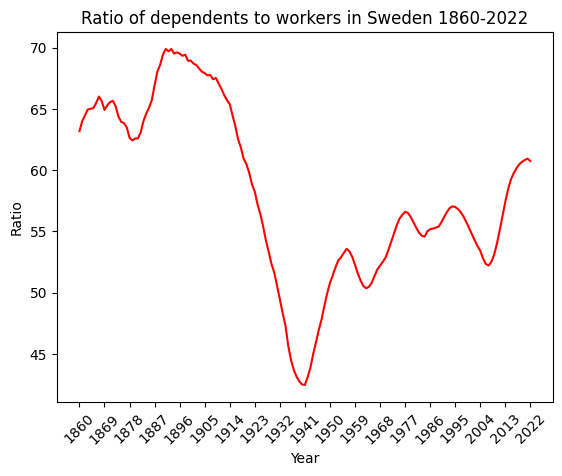

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

raw_df = pd.read_csv('swedish_population_by_year_and_sex_1860-2022.csv')

# Create a list of strings for every dependent age
dependent_ages = [str(i) for i in range(15)]
dependent_ages.extend([str(i) for i in range(65,110)])
dependent_ages.append('110+')
# Create a list of strings for every working age
workers_ages = [str(i) for i in range(15,65)]

# Group and sum by age then sex and rename the axis to type instead of gender
total_work_df = raw_df[raw_df['age'].isin(workers_ages)] \
    .groupby('age').sum() \
    .groupby('sex').sum() \
    .rename_axis('type') \
    .rename(index={'menwomen': 'worker'}) 

total_dep_df = raw_df[raw_df['age'].isin(dependent_ages)] \
    .groupby('age').sum() \
    .groupby('sex').sum() \
    .rename_axis('type') \
    .rename(index={'menwomen': 'depending'})

work_dep_df = pd.concat([total_work_df, total_dep_df]) # Concentrate the two dataframes to make one dataframe for both worker and depending

work_dep_df.loc['ratio'] = round((work_dep_df.loc['depending'] / work_dep_df.loc['worker'])*100,2) # Calculate the ratio of workers to dependents
work_dep_df = work_dep_df.T # Transpose the dataframe to make it easier to plot
work_dep_df.reset_index(inplace=True) #Reset the index to make it easier to plot

# Plot the ratio of workers to dependents
plt.plot(work_dep_df['index'], work_dep_df['ratio'], color = 'red', label = 'Ratio of dependents to workers')
plt.title('Ratio of dependents to workers in Sweden 1860-2022')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(work_dep_df.index[::9], rotation=45) # Show every 9th year
plt.show()

### Task ii
lot another figure that shows the fraction of the children, the elderly, and
the total dependent population of the total Swedish population from 1860
to 2022, and.

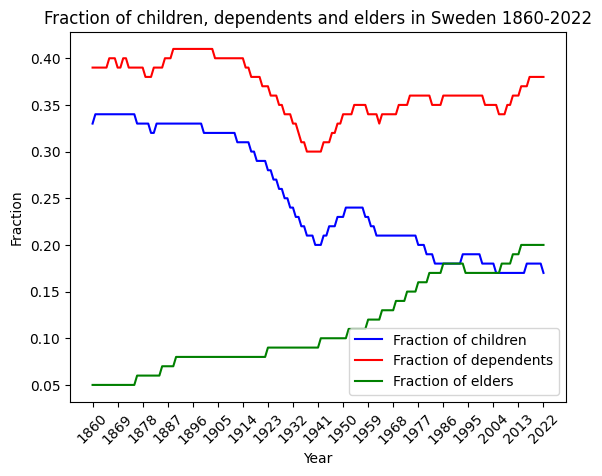

In [12]:
children_ages = [str(i) for i in range(0,15)]
elders_ages = [str(i) for i in range(65,110)]
elders_ages.append('110+')

total_children_df = raw_df[raw_df['age'].isin(children_ages)] \
    .groupby('age').sum() \
    .groupby('sex').sum() \
    .rename_axis('type') \
    .rename(index={'menwomen': 'children'})

total_edlers_df = raw_df[raw_df['age'].isin(elders_ages)] \
    .groupby('age').sum() \
    .groupby('sex').sum() \
    .rename_axis('type') \
    .rename(index={'menwomen': 'elders'})

age_groups_df = pd.concat([total_children_df, total_work_df, total_edlers_df, total_dep_df])

age_groups_df.loc['fraction children'] = round((age_groups_df.loc['children'] / (age_groups_df.loc['depending'] + age_groups_df.loc['worker'])),2)
age_groups_df.loc['fraction elders'] = round((age_groups_df.loc['elders'] / (age_groups_df.loc['depending'] + age_groups_df.loc['worker'])),2)
age_groups_df.loc['fraction dependent'] = round((age_groups_df.loc['depending'] / (age_groups_df.loc['depending'] + age_groups_df.loc['worker'])),2)

age_groups_df = age_groups_df.T # Transpose the dataframe to make it easier to plot
age_groups_df.reset_index(inplace=True) # Reset the index to make it easier to plot

plt.plot(age_groups_df['index'], age_groups_df['fraction children'], color = 'blue', label = 'Fraction of children')
plt.plot(age_groups_df['index'], age_groups_df['fraction dependent'], color = 'red', label = 'Fraction of dependents')
plt.plot(age_groups_df['index'], age_groups_df['fraction elders'], color = 'green', label = 'Fraction of elders')
plt.title('Fraction of children, dependents and elders in Sweden 1860-2022')
plt.xlabel('Year')
plt.ylabel('Fraction')
plt.xticks(age_groups_df.index[::9], rotation=45) # Show every 9th year
plt.legend(loc='lower right')
plt.show()

### Task iii
The fraction of dependents tell us that while dependents are still the same at large (during the whole time period) the fraction of children has gone down while the fraction of elderly has gone up. This can be attibuted to the fact that the life expectancy has gone up and the birth rate has gone down.

There are several reasons for this. One reason for the increase in the life expectancy is that health care has improved, and one reason for fertility rate going down could be that more women are working and focus more on their carreer rather than having children.

One significant time period is between 1896 and 1941 where the fraction of children drastically decreased while the elderly remained relatively stable. Resulting in a low ratio of dependents to workers bottoming in 1941, increasing after 1941 as a result of the post war baby boom and higher population of elders.